# Water absorption

In [28]:
# imports
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt
import pandas

from ocpy.water import absorption as w_abs
from ocpy.water.WOPP import WOPP 
from ocpy.utils import plotting

# Load up

In [38]:
wave = np.arange(200., 2010., 10)
wave

array([ 200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,  280.,
        290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,  370.,
        380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,  460.,
        470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,  550.,
        560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,  640.,
        650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,  730.,
        740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,  820.,
        830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,  910.,
        920.,  930.,  940.,  950.,  960.,  970.,  980.,  990., 1000.,
       1010., 1020., 1030., 1040., 1050., 1060., 1070., 1080., 1090.,
       1100., 1110., 1120., 1130., 1140., 1150., 1160., 1170., 1180.,
       1190., 1200., 1210., 1220., 1230., 1240., 1250., 1260., 1270.,
       1280., 1290., 1300., 1310., 1320., 1330., 1340., 1350., 1360.,
       1370., 1380., 1390., 1400., 1410., 1420., 1430., 1440., 1450.,
       1460., 1470.,

## Pure water

In [39]:
wl, pure, _ = WOPP.absorption(200., 2000., 0., T)

### Repo

In [46]:
pure_ioccg = w_abs.a_water(wave, data='IOCCG')
pure_pope = w_abs.a_water(wave)

## Salty water

In [12]:
S = 35. # PSU
T = 15. # Celsius

In [40]:
reload(WOPP)
wl, salty, _ = WOPP.absorption(wave.min(), wave.max(), S, T)

## Add CDOM

In [41]:
def a_cdom(wave, a440, Sdg=0.0125):
    i440 = np.argmin(np.abs(wave-440.))
    return a440 * np.exp(-Sdg * (wave-440.))

In [42]:
cdom = salty + a_cdom(wl, 1.)

# Plots

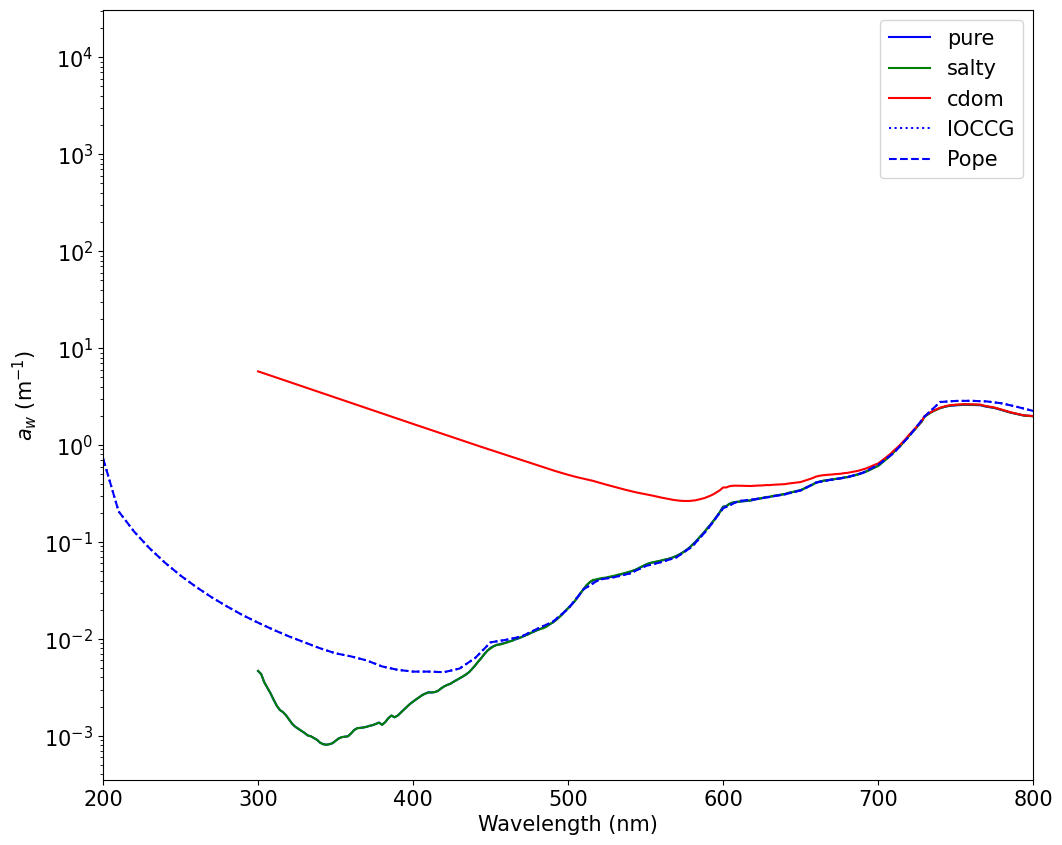

In [48]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
#
ax.plot(wl, pure, label='pure', c='b')
ax.plot(wl, salty, label='salty', c='g')
ax.plot(wl, cdom, label='cdom', c='r')
#
ax.plot(wave, pure_ioccg, label='IOCCG', c='b', ls=':')
ax.plot(wave, pure_ioccg, label='Pope', c='b', ls='--')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_w$ (m$^{-1}$)')
#
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim(200., 800)
ax.legend(fontsize=15.)
#
plotting.set_fontsize(ax, 15.)
#
plt.show()

In [ ]:
## Interpolate pure onto the other grid

# Generate table

In [32]:
df = pandas.DataFrame()
df['wl'] = wl
df['pure'] = pure
df['salty'] = salty
df['cdom'] = cdom

## Write

In [33]:
df.to_csv('a_w_for_andy.csv')